In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [4]:
# input data
x= df[['Age','EstimatedSalary']]

# output data
y=df['Purchased']

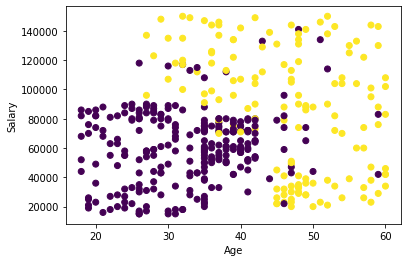

In [32]:
import matplotlib.pyplot as plt
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x['Age'], x['EstimatedSalary'], c=y)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [34]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


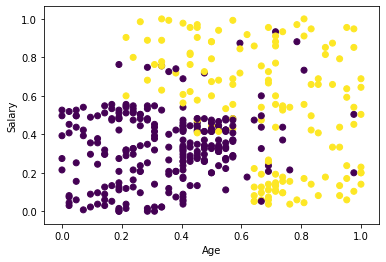

In [36]:
plt.xlabel('Age')
plt.ylabel('Salary')
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=y)

In [5]:
# cross- validation
from sklearn.model_selection import train_test_split

In [37]:
x_train,  x_test, y_train, y_test = train_test_split(x_scaled,y, random_state=0, test_size=0.25)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
classifier = LogisticRegression()

In [40]:
import seaborn as sns

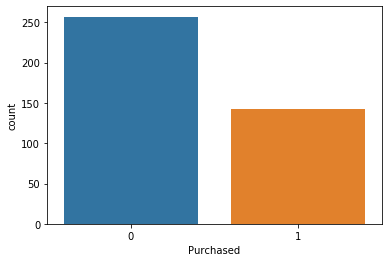

In [41]:
sns.countplot(x = y)

In [42]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [43]:
# trained algorithm
classifier.fit(x_train, y_train)

LogisticRegression()

In [44]:
# prediction
y_pred = classifier.predict(x_test)

(300,)

In [46]:
x_train.shape

(300, 2)

In [47]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [48]:
result = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})

In [49]:
result

,Actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(y_test, y_pred)

array([[67,  1],
       [10, 22]], dtype=int64)

In [52]:
y_test.value_counts()

0    68
1    32
Name: Purchased, dtype: int64

In [53]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


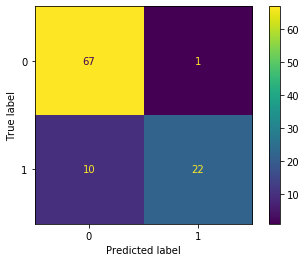

In [56]:
plot_confusion_matrix(classifier, x_test, y_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.89

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [61]:
new1 = [[26,34000]]
new2 = [[57, 138000]]

In [64]:
classifier.predict(scaler.transform(new1))

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int64)

In [65]:
classifier.predict(scaler.transform(new2))

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int64)